In [38]:
import numpy as np
import scipy.sparse as sparse

# Plant dynamic model matrices
A = np.zeros((82+(27*7),82+(27*7)))
B = np.eye(82+(27*7))
nx,nu = A.shape[0], B.shape[1]

# MPC settings
# Prediction horizon
npred = 4
# Weighting matrices
Q = (40/npred)*sparse.eye(nx)
R = (1/npred)*sparse.eye(nx)
# Controller output constraints
dumin = -0.5*np.ones(nu)
dumax = 0.5*np.ones(nu)
umin = -2*np.ones(nu)
umax = 2*np.ones(nu)

In [39]:
import mpc_driver as mpcCtrl

# Initialize MPC object
AcOshC = mpcCtrl.MPC(tau=None,tag='MPC',logs=None,delay=0,sampling_rate=1)
AcOshC.init(A,B,Q,R,npred,dumin,dumax,umin,umax)
AcOshC.start()

# Simulation initial conditions
np.random.seed(19680801)
# State and output
x = 2*np.random.uniform(-1,1,nx)
u = np.zeros(nu)

# Output references
xr = 0.5*np.ones(nx*npred)
#np.kron(np.ones((npred)),np.array([1,0.6,0.2,-0.2,-0.6,-1]))#


# Closed-loop simulation
nsim = 12
udt, xdt = np.zeros((nu,nsim)), np.zeros((nx,nsim)) 

for i in range(nsim):
    
    # Save u,y
    udt[:,i] = u
    xdt[:,i] = x
    
    AcOshC.update(x,xr,step=1)
    u = AcOshC.output()
    
    # Apply first control input to the plant
    w = -0.4*np.random.uniform(0.95,1.05,A.shape[0])
    x = np.dot(A,x) + np.dot(1.1*B,u) + w
    
# Terminate driver
AcOshC.terminate()

-----------------------------------------------------------------
           OSQP v0.5.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2018
-----------------------------------------------------------------
problem:  variables n = 1084, constraints m = 2168
          nnz(P) + nnz(A) = 6504
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off

iter   objective    pri res    dua res    rho        time
   1  -7.2960e+03   1.80e+00   3.76e+01   1.00e-01   1.61e-03s
  75  -6.6643e+03   4.72e-07   2.95e-05   9.29e-01   2.39e-03s

status:               solved
number of iterations: 75
opti

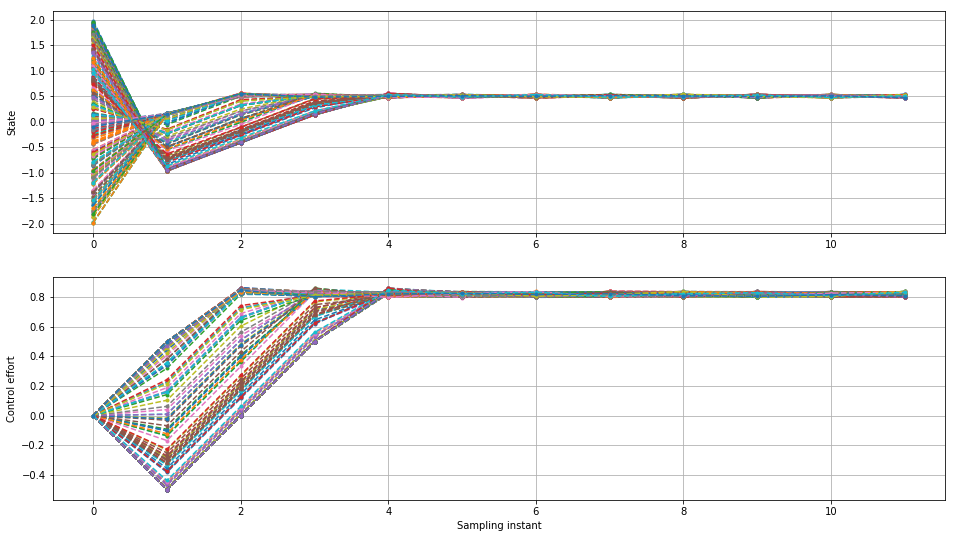

In [40]:
# Plot results
import matplotlib.pyplot as plt

kt = np.arange(0,nsim)

plt.figure(figsize=(16,9))
plt.subplot(211)
for k in range(nx):
    plt.plot(kt,xdt[k,:],'.--')
    plt.grid(True)
    plt.ylabel('State')
    
plt.subplot(212)
for k in range(nu):
    plt.plot(kt,udt[k,:],'.--')
    plt.grid(True)
    plt.ylabel('Control effort')
    plt.xlabel('Sampling instant')

plt.show()